In [43]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

In [2]:
def dist(X,mu, sigma):
    d = sp.multivariate_normal.pdf(X, mu, sigma)
    return d

In [71]:
X1 = np.random.randn(500,2)*[1,2] + 5
X2 = np.random.randn(500,2)*[1,1]
X3 = np.random.randn(500,2)*[1.2,1] - [2,-6]
X = np.row_stack((X1,X2, X3))

In [75]:
flat_list = [item for sublist in ([[0]]*500+[[1]]*500+[[2]]*500) for item in sublist]

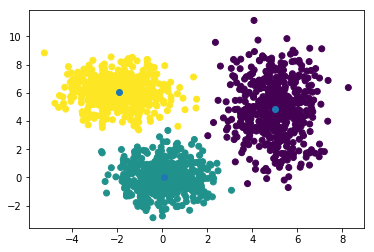

In [76]:
plt.scatter(X[:,0],X[:,1], c = flat_list)
plt.scatter(M[:,0],M[:,1])

In [72]:
M = np.row_stack((np.array([0,0]),np.array([1,1]),np.array([-1,2])))
M
sigma0 = np.eye(2)
sigma1 = np.eye(2)
sigma2 = np.eye(2)
sigma0

array([[1., 0.],
       [0., 1.]])

In [73]:
for i in range(60):
    D0 = np.empty((len(X),1))
    for i in range(len(X)):
        D0[i,0] = np.array(dist(X[i,], M[0,], sigma0), dtype = float)
    D1 = np.empty((len(X),1))
    for i in range(len(X)):
        D1[i,0] = dist(X[i,], M[1,], sigma1)
    D2 = np.empty((len(X),1))
    for i in range(len(X)):
        D2[i,0] = dist(X[i,], M[2,], sigma2)
    D = np.column_stack((D0,D1, D2))
    labels = np.argmin(D, axis = 1)
    M0 = np.mean(X[np.where(labels==0),][0], axis = 0)
    sigma0 = np.cov(X[np.where(labels==0),][0].T)
    M1 = np.mean(X[np.where(labels == 1),][0], axis = 0)
    sigma1 = np.cov(X[np.where(labels==1),][0].T)
    M2 = np.mean(X[np.where(labels == 2),][0], axis = 0)
    sigma2 = np.cov(X[np.where(labels==2),][0].T)
    M = np.row_stack((M0,M1,M2))

In [74]:
print('These are the centers.')
print(M)
print('This is the first vcov. Should be [1,0],[0,1].')
print(sigma0)
print('This is the second vcov. Should be [1,0],[0,4].')
print(sigma1)
print('This is the third vcov. Should be [1.44,0],[0,1].')
print(sigma2)

These are the centers.
[[ 0.07483637  0.0396643 ]
 [ 5.01735432  4.86018215]
 [-1.91390266  6.06436841]]
This is the first vcov. Should be [1,0],[0,1].
[[ 1.04879707 -0.02135985]
 [-0.02135985  1.04665772]]
This is the second vcov. Should be [1,0],[0,4].
[[0.97884005 0.00621107]
 [0.00621107 4.01228279]]
This is the third vcov. Should be [1.44,0],[0,1].
[[ 1.37001001 -0.01278584]
 [-0.01278584  1.07069878]]


In [ ]:
X1 = np.random.randn(200,2)*[1,2] + 5
X2 = np.random.randn(200,2)*[1,1]
X3 = np.random.randn(200,2)*[1.2,1] - [2,-6]